In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

140 H or T extreme cases P[.]: 6.64%


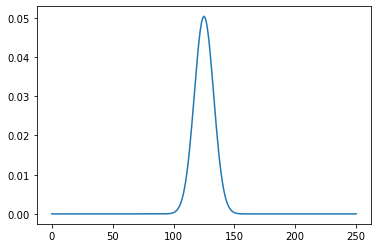

In [26]:
# coin throw 250 times got 140 HEADs and 110 TAILs, seems unlikely

ks = np.arange(0, 251)
binom_prob = binom.pmf(k=np.arange(0, 251), n=250, p=1/2)
plt.plot(binom_prob)

extreme_cases = binom_prob[:111].sum() + binom_prob[140:].sum()
print("140 H or T extreme cases P[.]: {:.2f}%".format(extreme_cases*100))

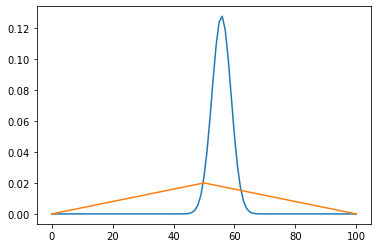

In [69]:
# estimating posterial based on above data 140 H 110 T
hypos = np.linspace(0, 1, 101)

# uniform vs triangle prior
tri = np.append(np.arange(50), np.arange(50, -1, -1))
tri = tri / tri.sum()
# prior = np.ones(101)/101
prior = tri.copy()

posterior = prior.copy()
likelihood = {'H': hypos.copy(), 'T': 1-hypos.copy()}
dataset = 'H' * 140 + 'T' * 110
for d in dataset:
    posterior *= likelihood[d]

posterior /= posterior.sum()  # normalize

plt.plot(posterior)
plt.plot(prior)

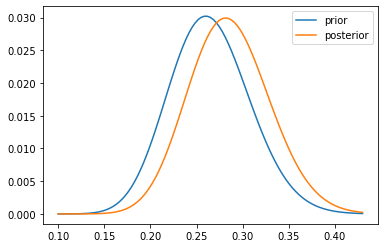

In [148]:
# estimating posterial based on above data 140 H 110 T
hypos = np.linspace(0.1, 0.43, 101)
prior = np.ones(101) / 101

# setting up prior, league average 20-33 hit out of 100
posterior = prior.copy()
likelihood = {'H': hypos.copy(), 'N': 1-hypos.copy()}
dataset = 'H' * 26 + 'N' * (100-26)
for d in dataset:
    posterior *= likelihood[d]

posterior /= posterior.sum()  # normalize

# update with new data
prior = posterior.copy()
posterior = prior.copy()
dataset = 'H' * 3 + 'N' * 0
for d in dataset:
    posterior *= likelihood[d]

posterior /= posterior.sum()  # normalize

plt.plot(hypos, prior, label='prior')
plt.plot(hypos, posterior, label='posterior')
plt.legend()

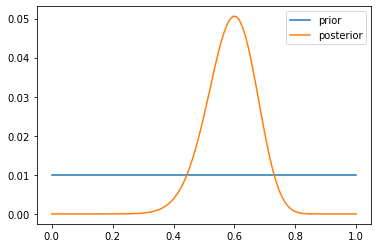

In [160]:
# estimating posterial of randomized suvey
# flip a coin: HEAD -> YES, TAIL -> answer questoin [Y/N]
# data of 100: 80 YES, 20 NO
N, nY = 100, 80
hypos = np.linspace(0, 1, 100)  # P[actual YES %]
prior = np.ones(100) / 100 # uniform prior
posterior = prior.copy()
likelihood = {'Y': (1+hypos)/2, 'N': (1-hypos)/2}

dataset = 'Y' * nY + 'N' * (N-nY)
for d in dataset:
    posterior *= likelihood[d]

posterior /= posterior.sum()  # normalize

plt.plot(hypos, prior, label='prior')
plt.plot(hypos, posterior, label='posterior')
plt.legend()

50
50
50


Text(0, 0.5, 'Pmf')

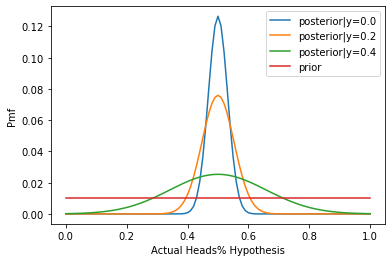

In [178]:
# Suppose you want to test whether a coin is fair -> actual hypos X,
# measurement error probability is y=0.2, N = 250 times -> H = 140
# what is the posterior distribution of x, actual coin's head biasness? see pictures
# What happens as you vary the value of y? higher the error, higher the variances
N, nY = 250, 125
hypos = np.linspace(0, 1, 101)  # P[actual Heads%]
prior = np.ones(101) / 101 # uniform prior
dataset = 'H' * nY + 'T' * (N-nY)

def update_unreliable(prior, y):
    posterior = prior.copy()

    likelihood = {
        'H': (1-y) * hypos + y * (1-hypos),
        'T': y * hypos + (1-y) * (1-hypos),
    }
    for d in dataset:
        posterior *= likelihood[d]

    posterior /= posterior.sum()  # normalize
    return posterior

for y in [0.0, 0.2, 0.4]:
    posterior = update_unreliable(prior, y)
    print(posterior.argmax())
    plt.plot(hypos, posterior, label=f'posterior|y={y}')

plt.plot(hypos, prior, label='prior')
plt.legend()
plt.xlabel('Actual Heads% Hypothesis')
plt.ylabel('Pmf')

0


Text(0, 0.5, 'Pmf')

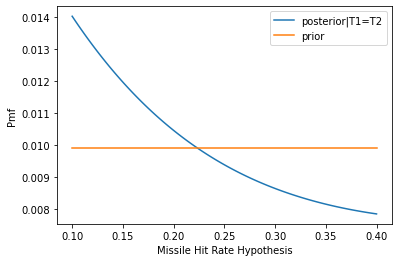

In [204]:
# Missile hit rate uniform(0.1, 0.4)
# Data: 2 tests, taking two shots each test. Hit with the same number of targets
hypos = np.linspace(0.1, 0.4, 101)  # P[hit%]
prior = np.ones(101) / 101 # uniform prior

posterior = prior.copy()
likelihood = np.sum([
    (1-hypos)**4,
    (2*hypos*(1-hypos))**2,
    hypos**4
], axis=0)
posterior *= likelihood
posterior /= posterior.sum()  # normalize

print(posterior.argmax())
plt.plot(hypos, posterior, label=f'posterior|T1=T2')

plt.plot(hypos, prior, label='prior')
plt.legend()
plt.xlabel('Missile Hit Rate Hypothesis')
plt.ylabel('Pmf')